# Regressão com NN

## Introdução

Vimos anteriormente qual o tipo de resposta esperamos com uma regressão. Veremos agora uma outra forma de prever valores numéricos porém utilizando redes neurais.

Vamos rapidamente discutir como é formada a estrutura de uma rede e como sua arquitetura se comporta.

## Exemplo de implementação de Rede Neural

Entende-se por DeepLearning uma técnica de aprendizado de máquina que ensina o computador a realizar o que humanos fazem por natureza: Aprender por exemplo.

Redes Neurais são o estado da arte no que tange computação cognitiva nos dias atuais e suas aplicações dentro das ciências da computação vão desde carros autonomos aos identificadores de face.

Nós vamos entender como uma rede neural funciona de forma melhor quando abordado em computação cognitiva, mas para um breve resumo; Temos um conjunto de vetores de entrada, estes inputs de entrada tem seu valor modificado pelas n camadas escondidas do modelo até que seu valor seja transformado em um vetor de saída.

![SVM01](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

Cada nó desta rede executa a soma de cada peso recebido por seus nós anteriores e tem sua multiplicação propagada por uma função de ativação:

![SVM02](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2.-ann-structure.jpg)

Está estrutura tenta representar o que ocorre em um neurônio quando estimulado:

![SVM03](https://www.codeproject.com/KB/AI/1205732/neuron.png)

![SVM04](https://cdn-images-1.medium.com/max/2000/1*1Jr-Lt9vcEOW2opvZyLbdA.png)

Diferente dos modelos apresentados anteriormente, uma rede neural trabalha melhor com um número maior de features e pode precisar de um número muito maior de entradas de treino para convergir de maneira satisfatória.

A biblioteca aqui utilizada será o `Tensorflow`.

In [0]:
from IPython.lib.display import YouTubeVideo

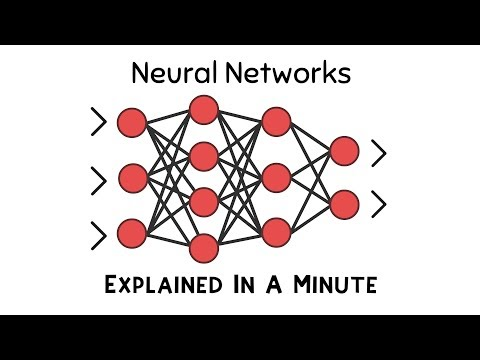

In [0]:
YouTubeVideo('rEDzUT3ymw4')

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Base de dados

Para este exemplo vamos utilizar um dataset público conhecido como [boston_housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) e nosso objetivo é prever valores de imóveis tendo alguns dados como *inputs*.

### Visão geral do dataset

Temos 14 colunas descritas como:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in 1000's

Lembre-se, vamos tentar prever o valor da coluna `MEDV`!

#### Carregando o dataset

A lib `Keras` implementa um facilitador para obter os datasets assim como faz a lib `sklearn`.

In [0]:
boston_dataset = keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston_dataset.load_data()

57344/57026 [==============================] - 0s 8us/step


In [0]:
ordem = np.argsort(np.random.random(y_train.shape))
X_train = X_train[ordem]
y_train = y_train[ordem]

#### Criando um dataframe

Vamos criar um dataframe para melhor visualizar a informação.

In [0]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [0]:
df = pd.DataFrame(X_train, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79
1,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
2,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
3,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
4,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20


Podemos ver um exemplo da coluna `MEDV`, nosso **_target_**.

In [0]:
print(y_train[0:5])

[25.  23.9 19.4 16.7 19.4]


#### Normalizando os inputs

Precisamos normalizar nossos inputs de entrada, vamos ver como fazer isso sem utilizar a lib `sklearn`.

In [0]:
media = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - media) / std
X_test = (X_test - media) / std

Exemplo de saída após normalização

In [0]:
print(X_train[0])

[ 0.08633485 -0.48361547  1.0283258  -0.25683275  1.81517685  0.18467587
  0.68047421 -0.60268802  1.67588577  1.5652875   0.78447637  0.21040391
 -0.68328966]


Vamos entender como o modelo é criado, temos uma classe chamada `Sequential`, ela monta um array de layers.

No caso do nosso modelo, a classe encapsula 2 hidden layers (camada escondida) e um layer de output.

Criamos uma função chamada `build_model()` que retorna nosso modelo.

In [0]:
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(keras.layers.Dense(1))

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Nosso modelo será treinado durante 500 épocas.

Os resultados obtidos no treinamento de cada época é guardado na variável `history`.

In [0]:
EPOCHS = 500

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 1s 3ms/step - loss: 606.5545 - mean_absolute_error: 22.7407 - val_loss: 501.9636 - val_mean_absolute_error: 21.1373
Epoch 2/500
323/323 [==============================] - 0s 51us/step - loss: 565.0954 - mean_absolute_error: 21.8733 - val_loss: 467.8043 - val_mean_absolute_error: 20.3481
Epoch 3/500
323/323 [==============================] - 0s 53us/step - loss: 524.5293 - mean_absolute_error: 20.9827 - val_loss: 421.7572 - val_mean_absolute_error: 19.2558
Epoch 4/500
323/323 [==============================] - 0s 53us/step - loss: 470.3516 - mean_absolute_error: 19.7736 - val_loss: 366.4819 - val_mean_absolute_error: 17.8613
Epoch 5/500
323/323 [==============================] - 0s 53us/step - loss: 406.1743 - mean_absolute_error: 18.2166 - val_loss: 297.7823 - val_mean_absolute_error: 15.9625
Epoch 6/500
323/323 [==============================] - 0s 51us/step - loss: 330.0726 - mean_abso

Podemos plotar o erro para nosso dado de treino e teste num gráfico.

Facilitando a verificação de overfit e underfit.

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

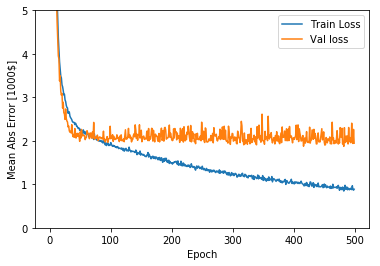

In [0]:
plot_history(history)

Vemos que houve pouco melhora em nosso modelo após a 200ª época. Podemos criar um gatilho de earlystopping.

Este gatilho irá automaticamente parar o treinamento caso ele não veja melhoria no modelo em um número definido de épocas.

Para isso, devemos modificar o nosso modelo:

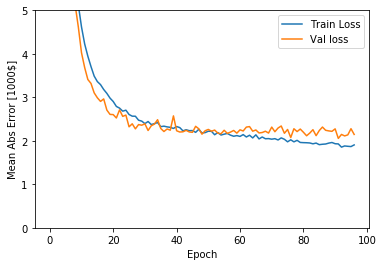

In [0]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop])

plot_history(history)

Os resultados mostram que nosso modelo após treinado tem um erro de US 2500.00.

In [0]:
[loss, mae] = model.evaluate(X_test, y_test)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

102/102 [==============================] - 0s 59us/step
Testing set Mean Abs Error: $2911.54


Vamos ver como o modelo se comporta ao prever pontos.

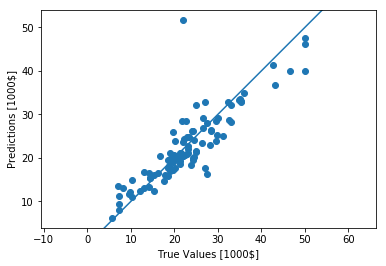

In [0]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

## conclusao

- O erro quadrático médio (MSE) é comumente utilizado na predição de valores numéricos discretos em problemas de regressão linear;
- Diferente de problemas de classificação; Para problemas de regressão é comum utilizar métricas como o erro médio absoluto (MAE);
- Quando nossos inputs estão em _ranges_ distintos, é uma boa prática quando falamos de modelos que dependem de cálculo de distâncias a padronização ou normalização destes valores;
- Se o número de amostras for pequeno, de preferência sempre a redes com poucas camadas escondidas para evitar _overfit_ da rede.
- EarlyStopping é um bom meio de evitar o _overfit_.

## Desafio:

Criar um modelo de rede neural para resolver o problema da aula passada. Utilize os mesmos meios demonstrados acima. Para facilitar, vou importar os dados em um formato de dataset.

In [0]:
dados = pd.read_csv('https://github.com/pgiaeinstein/comp_cog/raw/master/custo_colaborador_filtro.csv')
dados.head()